### 1. Import libraries, load and inspect datasets

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('survey/dataset_psycology_survey.csv')
df_pred_ = pd.read_csv('survey/submission_psycology_survey.csv')

#### 1.1. Submission Dataset

In [45]:
print('Submission dataset has {} rows and {} columns'.\
      format(df_pred_.shape[0], df_pred_.shape[1]))
df_pred_.sample(5)

Submission dataset has 40 rows and 150 columns


,Unnamed: 0,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
33,33,5.0,4.0,3.0,1.0,1.0,2.0,3.0,3.0,4.0,...,20.0,178.0,74.0,0.0,male,right handed,secondary school,yes,village,block of flats
6,6,5.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,...,19.0,166.0,51.0,1.0,female,right handed,secondary school,no,city,block of flats
38,38,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,24.0,165.0,49.0,2.0,female,right handed,masters degree,no,city,block of flats
12,12,5.0,2.0,2.0,2.0,3.0,4.0,4.0,3.0,5.0,...,22.0,177.0,61.0,1.0,female,right handed,secondary school,no,city,block of flats
22,22,5.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,5.0,...,20.0,160.0,49.0,2.0,female,right handed,college/bachelor degree,yes,village,house/bungalow


#### 1.2. Training Dataset

In [46]:
print('Training dataset has {} rows and {} columns'.format(df_train.shape[0], df_train.shape[1]))
print('\n' + '* ' * 40)
print(df_train.head())

Training dataset has 970 rows and 150 columns

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   

#### 1.3. Find the target column by mismatching columns between 2 datasets

In [47]:
train_pred = [x for x in df_train.columns if x not in df_pred_.columns]
pred_train = [x for x in df_pred_.columns if x not in df_train.columns]
print(train_pred)
print(pred_train)

['Spending on healthy eating']
['Unnamed: 0']


#### 1.4. Select 35 relevant features for the target
The task of the problem is to predict how a person will rate the quote,      
**"I will hapilly pay more money for good, quality or healthy food."**       
in a scale from 1 to 5 in which 1 is strongly disagree, and 5 is strongly agree,     
given serveral of the individual rating on the other quotes (features).    
We picked 35 features out of 150 that we think they are relevant to the task.

In [48]:
# List of selected features indice in the training dataframe
features_idx = [38,39,44,49,50,53,54,55,56,57,58,61,73,74,
                75,93,95,101,112,123,124,126,132,133,134,
                135,136,137,138,140,141,142,143,144,146]
features = [df_train.columns.to_list()[k] for k in features_idx]
print(len(features), 'features are selected:\n')
print(features)

35 features are selected:

['Economy Management', 'Biology', 'Medicine', 'Countryside, outdoors', 'Dancing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Adrenaline sports', 'Smoking', 'Alcohol', 'Healthy eating', 'Hypochondria', 'Eating to survive', 'Health', 'Appearence and gestures', 'Happiness in life', 'Energy levels', 'Personality', 'Internet usage', 'Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Education']


### 2. Perform EDA for the Datasets

In [49]:
# Separate categorical features and numerical features for data cleaning
categorical_features = [f for f in features if df_train[f].dtype == 'object']
print(len(categorical_features), 'categorical features:')
print(categorical_features)
numerical_features   = [f for f in features if df_train[f].dtype in ['int64', 'float64']]
print('\n', len(numerical_features), 'numerical features:')
print(numerical_features)

5 categorical features:
['Smoking', 'Alcohol', 'Internet usage', 'Gender', 'Education']

 30 numerical features:
['Economy Management', 'Biology', 'Medicine', 'Countryside, outdoors', 'Dancing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Adrenaline sports', 'Healthy eating', 'Hypochondria', 'Eating to survive', 'Health', 'Appearence and gestures', 'Happiness in life', 'Energy levels', 'Personality', 'Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Age', 'Height', 'Weight', 'Number of siblings']


#### 2.1. Clean and Process Categorical Features

In [50]:
# Check for number of NaN values in each of features of 
    # Training dataframe
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_train[f].value_counts(dropna=False))
    
print('\n' + '* ' * 30)
    # Submission dataframe
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_pred_[f].value_counts(dropna=False))


* * * * * * * * * * * * * * * * * * * * 
tried smoking     413
never smoked      200
current smoker    182
former smoker     169
NaN                 6
Name: Smoking, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
social drinker    636
drink a lot       212
never             118
NaN                 4
Name: Alcohol, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
few hours a day            714
less than an hour a day    134
most of the day            119
no time at all               3
Name: Internet usage, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
female    571
male      393
NaN         6
Name: Gender, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
secondary school                    540
college/bachelor degree             204
primary school                       78
masters degree                       65
secondary schools                    56
MS                                   12
currently a primary school pupil     10
doctorate degree            

In [51]:
# Fill missing data with the most frequent value in each features on:
for f in categorical_features:
  # Training set
  c = df_train[f].value_counts()
  df_train[f].fillna(c[c == c.iloc[0]].index.to_list()[0], inplace=True)

  # Submission set
  d = df_pred_[f].value_counts()
  df_pred_[f].fillna(d[d == d.iloc[0]].index.to_list()[0], inplace=True)

In [52]:
# Recount values and check for missing values in each features on
    # Training set
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_train[f].value_counts(dropna=False))

    # Submission set
print('\n' + '* ' * 30)
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_pred_[f].value_counts(dropna=False))


* * * * * * * * * * * * * * * * * * * * 
tried smoking     419
never smoked      200
current smoker    182
former smoker     169
Name: Smoking, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
social drinker    640
drink a lot       212
never             118
Name: Alcohol, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
few hours a day            714
less than an hour a day    134
most of the day            119
no time at all               3
Name: Internet usage, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
female    577
male      393
Name: Gender, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
secondary school                    541
college/bachelor degree             204
primary school                       78
masters degree                       65
secondary schools                    56
MS                                   12
currently a primary school pupil     10
doctorate degree                      4
Name: Education, dtype: int64

* * * * * * * *

In [53]:
# Rank the categorical values in feature 'Smoking' then decode those values
smoke = ['never smoked', 'tried smoking', 'former smoker', 'current smoker']
f = lambda x: smoke.index(x) + 1

df_train['Smoking'] = df_train['Smoking'].apply(f)
df_pred_['Smoking'] = df_pred_['Smoking'].apply(f)

In [54]:
# Rank the categorical values in feature 'Alcohol' then decode those values
drink = ['never', 'social drinker', 'drink a lot']
f = lambda x: drink.index(x) + 1

df_train['Alcohol'] = df_train['Alcohol'].apply(f)
df_pred_['Alcohol'] = df_pred_['Alcohol'].apply(f)

In [55]:
# Rank the categorical values in feature 'Internet usage' then decode those values
internet = ['no time at all', 'less than an hour a day', 
            'few hours a day', 'most of the day']
f = lambda x: internet.index(x) + 1

df_train['Internet usage'] = df_train['Internet usage'].apply(f)
df_pred_['Internet usage'] = df_pred_['Internet usage'].apply(f)

In [56]:
# Partition the values in feature 'Education' in 2 groups: 
# college for 1 and non-college degrees for 0
degrees = ['college/bachelor degree', 'masters degree', 'MS', 'doctorate degree']
f = lambda e: 1 if e in degrees else 0

df_train['Education'] = df_train['Education'].apply(f)
df_pred_['Education'] = df_pred_['Education'].apply(f)

In [57]:
# Assign value of feature 'Gender' 0 for female and 1 for male
f = lambda x: 0 if x == 'female' else 1

df_train['Gender'] = df_train['Gender'].apply(f)
df_pred_['Gender'] = df_pred_['Gender'].apply(f)

In [58]:
# Recount values / check for NaN in categorical features on:
    # Training set
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_train[f].value_counts(dropna=False))

print('\n' + '* ' * 30)
    
    # Submission set
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_pred_[f].value_counts(dropna=False))


* * * * * * * * * * * * * * * * * * * * 
2    419
1    200
4    182
3    169
Name: Smoking, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
2    640
3    212
1    118
Name: Alcohol, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
3    714
2    134
4    119
1      3
Name: Internet usage, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
0    577
1    393
Name: Gender, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
0    685
1    285
Name: Education, dtype: int64

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * 
2    19
1     8
4     7
3     6
Name: Smoking, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
2    24
3    10
1     6
Name: Alcohol, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
3    30
4     5
2     5
Name: Internet usage, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
0    22
1    18
Name: Gender, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
0    27
1    13
Name:

#### 2.2. Clean and Process Numerical Features

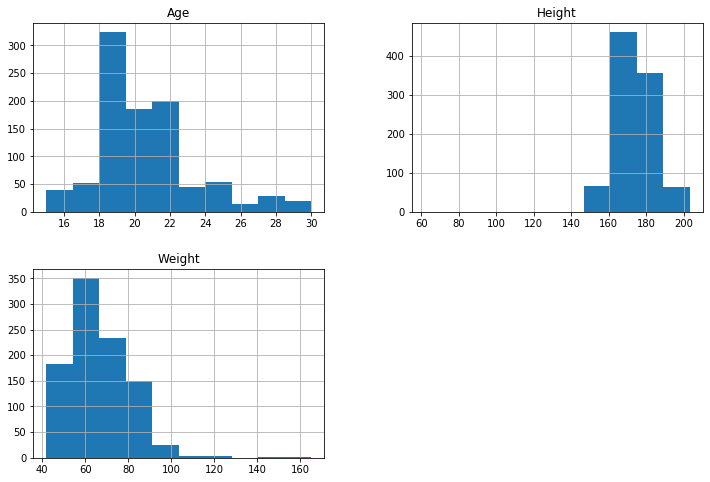

<function matplotlib.pyplot.show(*args, **kw)>

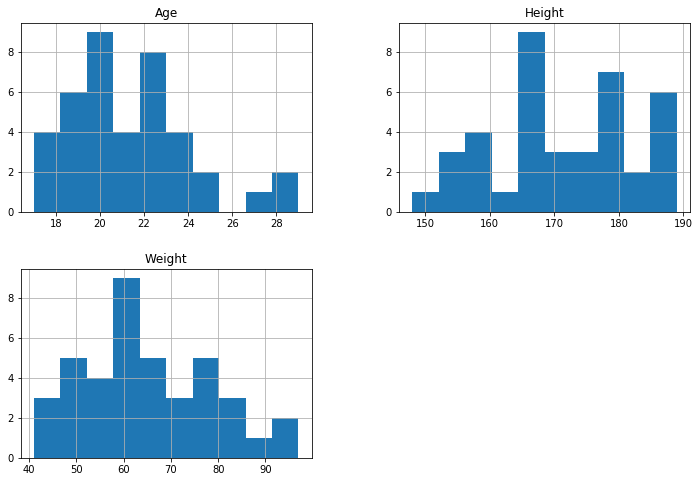

In [59]:
# Inspect and compare the distribution of continuous numerical features in:
c = ['Height', 'Weight', 'Age']

# Training set
df_train[c].hist(figsize=(12,8))
plt.show()

# Submission set
df_pred_[c].hist(figsize=(12,8))
plt.show

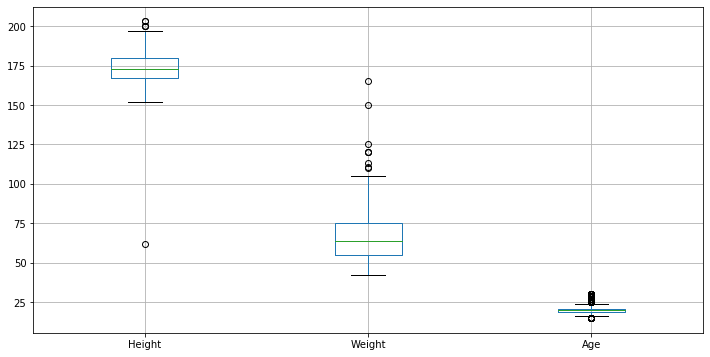

<function matplotlib.pyplot.show(*args, **kw)>

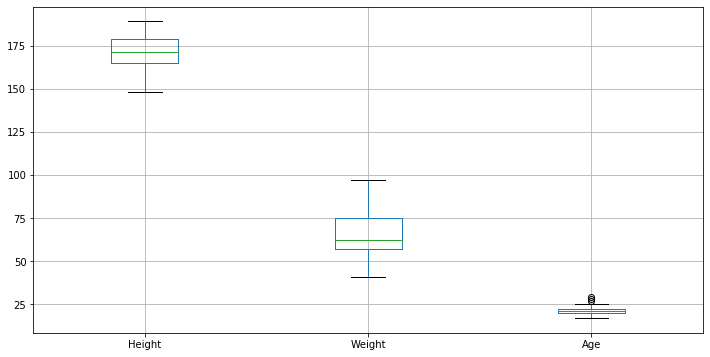

In [60]:
# Plot boxplot to detect outliners of numerical features on:
# Training set
df_train[c].boxplot(figsize=(12,6))
plt.show()

# Submission set
df_pred_[c].boxplot(figsize=(12,6))
plt.show

##### The Height's range in Submission set is  (125cm,  200cm)
##### The Weight's range in Submission set is  not higher than 100kg
##### Hence anything in the Training outside these ranges are to be removed.

In [61]:
removed_idx = []
# over_height defined by Height of anyone > 200cm
over_height = df_train[c][df_train.Height > 200]
removed_idx.extend(over_height.index.to_list())
print(over_height)

# under_height defined by Height of anyone < 125cm
under_height = df_train[c][df_train.Height < 125]
removed_idx.extend(under_height.index.to_list())
print(under_height)

# over_weight defined by Weight of anyone > 110kg
over_weight = df_train[c][df_train.Weight > 110]
removed_idx.extend(over_weight.index.to_list())
print(over_weight)

print('\nRows with following indices needs to be removed:')
print(removed_idx)

     Height  Weight   Age
523   203.0    80.0  21.0
764   203.0    89.0  18.0
     Height  Weight   Age
646    62.0    55.0  20.0
     Height  Weight   Age
283   184.0   120.0  21.0
683   183.0   111.0  29.0
758   185.0   120.0  24.0
761   189.0   113.0  27.0
823   190.0   125.0  20.0
849     NaN   165.0  23.0
933   175.0   120.0  20.0
952   200.0   150.0  30.0

Rows with following indices needs to be removed:
[523, 764, 646, 283, 683, 758, 761, 823, 849, 933, 952]


In [62]:
# Remove rows with outliners of Height and Weight in Training set
df_train.drop(index=removed_idx, inplace=True)
df_train.reset_index(drop=True, inplace=True)

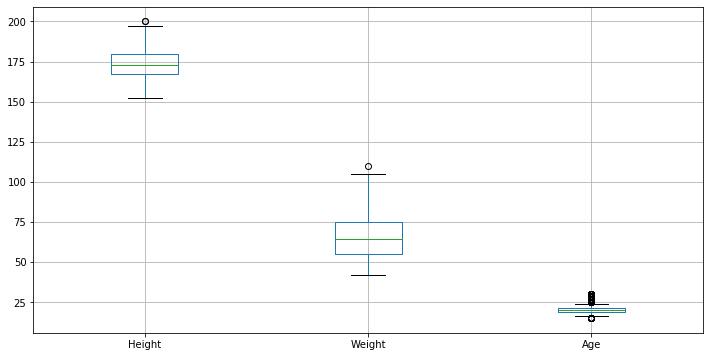

<function matplotlib.pyplot.show(*args, **kw)>

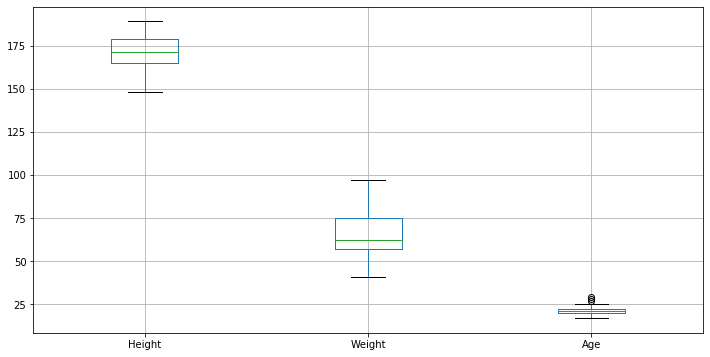

In [63]:
# Plot boxplot to detect outliners of numerical features on:
# Training set
df_train[c].boxplot(figsize=(12,6))
plt.show()

# Submission set
df_pred_[c].boxplot(figsize=(12,6))
plt.show

In [64]:
# Fill in missing numerical values
for f in c:
  df_train[f] = df_train[f].fillna(df_train[f].median())
  df_pred_[f] = df_pred_[f].fillna(df_pred_[f].median())

In [65]:
# Count values of the discrete numerical features and check for missing values:
d = [f for f in features if f not in c]

# In Training set
for f in d:
  print('\n' + '* ' * 20)
  print(df_train[f].value_counts(dropna=False))

print('\n' + '* ' * 30)
# In Submission set
for f in d:
  print('\n' + '* ' * 20)
  print(df_pred_[f].value_counts(dropna=False))


* * * * * * * * * * * * * * * * * * * * 
1.0    250
2.0    227
3.0    207
4.0    154
5.0    116
NaN      5
Name: Economy Management, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
2.0    262
1.0    238
3.0    191
5.0    150
4.0    113
NaN      5
Name: Biology, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
1.0    292
2.0    235
3.0    204
5.0    142
4.0     82
NaN      4
Name: Medicine, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
5.0    293
4.0    286
3.0    212
2.0    102
1.0     60
NaN      6
Name: Countryside, outdoors, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
1.0    359
2.0    183
3.0    167
5.0    146
4.0    102
NaN      2
Name: Dancing, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
5.0    295
3.0    215
4.0    171
2.0    141
1.0    122
NaN     15
Name: Passive sport, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
5.0    303
3.0    186
1.0    184
4.0    164
2.0    119
NaN      3
Name: Active sport, dtype: int64

* * * * * 

In [66]:
# Fill missing values in each numerical features with its median
for f in d:
  df_train[f] = df_train[f].fillna(df_train[f].median())
  df_pred_[f] = df_pred_[f].fillna(df_pred_[f].median())

# Double check for more missing values in both datasets
print(df_train[features].isnull().sum())
print('\n' + '* ' * 20)
print(df_pred_[features].isnull().sum())

Economy Management         0
Biology                    0
Medicine                   0
Countryside, outdoors      0
Dancing                    0
Passive sport              0
Active sport               0
Gardening                  0
Celebrities                0
Shopping                   0
Science and technology     0
Adrenaline sports          0
Smoking                    0
Alcohol                    0
Healthy eating             0
Hypochondria               0
Eating to survive          0
Health                     0
Appearence and gestures    0
Happiness in life          0
Energy levels              0
Personality                0
Internet usage             0
Finances                   0
Shopping centres           0
Branded clothing           0
Entertainment spending     0
Spending on looks          0
Spending on gadgets        0
Age                        0
Height                     0
Weight                     0
Number of siblings         0
Gender                     0
Education     

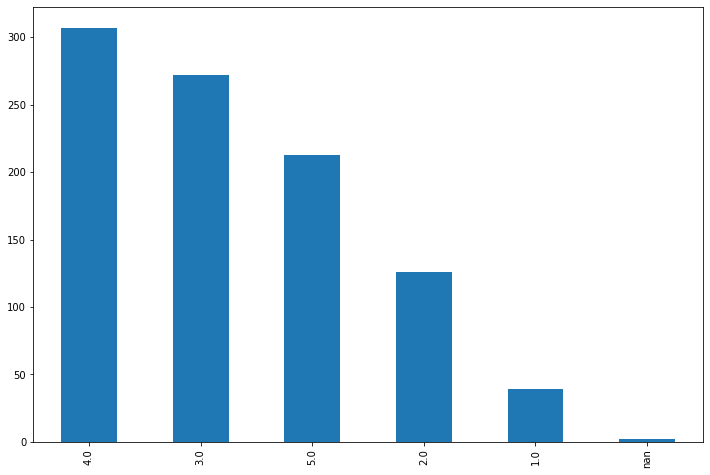

4.0    307
3.0    272
5.0    213
2.0    126
1.0     39
NaN      2
Name: Spending on healthy eating, dtype: int64


In [67]:
# Check for missing values in the target
y = df_train['Spending on healthy eating']
s = y.value_counts(dropna=False)
s.plot(kind='bar', figsize=(12,8))
plt.show()
print(s)

In [68]:
removed_idx = df_train[y.isnull()].index.to_list()
df_train.drop(index=removed_idx, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [70]:
# Create a training set with selected features
X, y = df_train[features], df_train['Spending on healthy eating']
y = y.apply(lambda x: x - 2 if x > 2 else 0)
X_pred_ = df_pred_[features]

In [71]:
# Run a Chi-square test to find the top k features in the datasets
from sklearn.feature_selection import SelectKBest, chi2
ch2 = SelectKBest(chi2, k=10)
ch2.fit(X, y)
top_k = ch2.get_support(indices=True)
print(top_k)

[ 6 10 11 14 16 17 25 26 27 28]


In [72]:
top_features = [features[t] for t in top_k]
print(top_features)

['Active sport', 'Science and technology', 'Adrenaline sports', 'Healthy eating', 'Eating to survive', 'Health', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets']


In [73]:
# Select a new dataframe with top k features from X
# X, X_pred_ = ch2.transform(X), ch2.transform(X_pred_)
X = df_train[top_features]
print(X.shape, y.shape)
print('\n' + '* ' * 20)

# Double check target
print(y.value_counts())

(957, 10) (957,)

* * * * * * * * * * * * * * * * * * * * 
2.0    307
1.0    272
3.0    213
0.0    165
Name: Spending on healthy eating, dtype: int64


### **3. Train and Validate Baseline Models**
> #### **3.1. Set up Librabries and Helper Functions**

In [74]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def get_models(seed=111, n_trees=100):
    models = {}
    # Logistic Regression
    models['LGR'] = LogisticRegression()
    # Support Vector Classifier
    models['SVC'] = SVC(gamma='auto')
    # KNearest Neighbors Classifier
    models['KNN'] = KNeighborsClassifier(n_neighbors=3)
    # Bagging Classifier
    models['BAG'] = BaggingClassifier(n_estimators=n_trees, random_state=seed )
    # Random Forest Classifier
    models['RFR'] = RandomForestClassifier(n_estimators=n_trees, random_state=seed)
    # Extra Trees Classifier
    models['ETC'] = ExtraTreesClassifier(n_estimators=n_trees, random_state=seed)
    # Quadratic Discriminant Analysis
    models['QDA'] = QuadraticDiscriminantAnalysis()
    # Neural Network
    models['ANN'] = MLPClassifier()
    return models

print('Setup OK. Ready for training!')

Setup OK. Ready for training!


> #### **3.2. Train and Validate Models**

In [75]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import cross_val_predict as CVP

seed, n_trees = 111, 100
models = get_models(seed, n_trees)

X, y = np.array(X), np.array(y)
model_accuracy, m = {}, len(np.unique(y))

for name, model in models.items():
  acc, cfm = [], np.zeros((m,m))
  kf = KFold(n_splits=20, shuffle=True, random_state=seed)
  acc = CVS(model, X, y, cv=kf, scoring='accuracy')
  y_pred = CVP(model, X, y, cv=kf)
  cfm = confusion_matrix(y, y_pred)
  model_accuracy[name] = acc
  print('Model\tAccuracy (Mean)\tAccuracy (STD)')
  print('{}\t{:.3f}\t\t{:.3f}'.format(name, np.mean(acc), np.std(acc)))
  print('\tConfusion Matrix:')
  print(cfm)
  print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
LGR	0.385		0.052
	Confusion Matrix:
[[ 45  59  51  10]
 [ 33  88 123  28]
 [ 26  70 161  50]
 [  5  46  88  74]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
SVC	0.411		0.040
	Confusion Matrix:
[[ 36  61  55  13]
 [ 23 130  89  30]
 [ 19  95 153  40]
 [ 11  45  83  74]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
KNN	0.321		0.061
	Confusion Matrix:
[[ 44  66  43  12]
 [ 60 120  69  23]
 [ 70 118  89  30]
 [ 36  71  52  54]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
BAG	0.369		0.057
	Confusion Matrix:
[[ 42  61  47  15]
 [ 38  99 102  33]
 [ 32  90 130  55]
 [ 13  41  77  82]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
RFR	0.385		0.080
	Confusion Matrix:
[[ 40  69  41  15]
 [ 34 103 100  35]
 [ 25  88 144  50]
 [ 14  39  79  81]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
ETC	0.380		0.070
	Confusion Matrix:
[[ 37  60  51  17

> #### **3.3. Visualize Accuracy Scores**

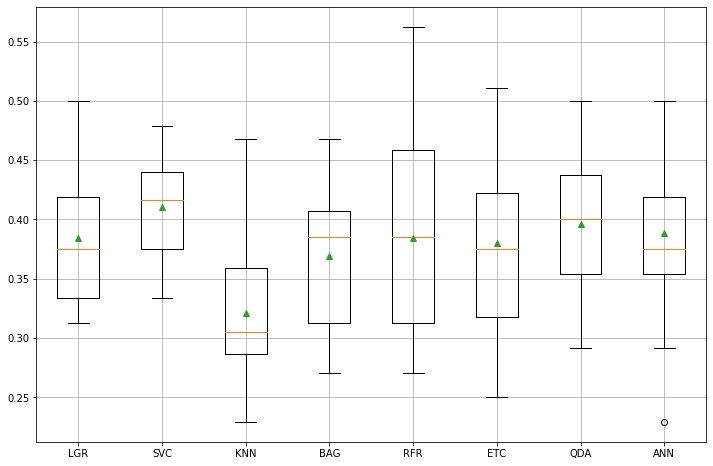

In [76]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12,8)
plt.show()

### **4. Improve Model Performances by Stacking the Best Models**

In [83]:
from sklearn.ensemble import StackingClassifier

seed, n_trees = 111, 100
models = get_models(seed, n_trees)

hidden_layers = [('QDA', models['QDA']), ('SVC', models['SVC'])]
last_layer = models['ANN']
model = StackingClassifier(estimators=hidden_layers, final_estimator=last_layer)

m = len(np.unique(y))
acc, cfm = [], np.zeros((m,m))

kf = KFold(n_splits=20, shuffle=True, random_state=seed)
acc = CVS(model, X, y, cv=kf, scoring='accuracy')
y_pred = CVP(model, X, y, cv=kf)
cfm = confusion_matrix(y, y_pred)
model_accuracy['STACK'] = acc
print('Model\tAccuracy (Mean)\tAccuracy (STD)')
print('STACK\t{:.3f}\t\t{:.3f}'.format(np.mean(acc), np.std(acc)))
print('\tConfusion Matrix:')
print(cfm)
print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
STACK	0.411		0.047
	Confusion Matrix:
[[ 39  54  62  10]
 [ 19 116 117  20]
 [ 17  88 164  38]
 [ 11  48  87  67]]

* * * * * * * * * * * * * * * 


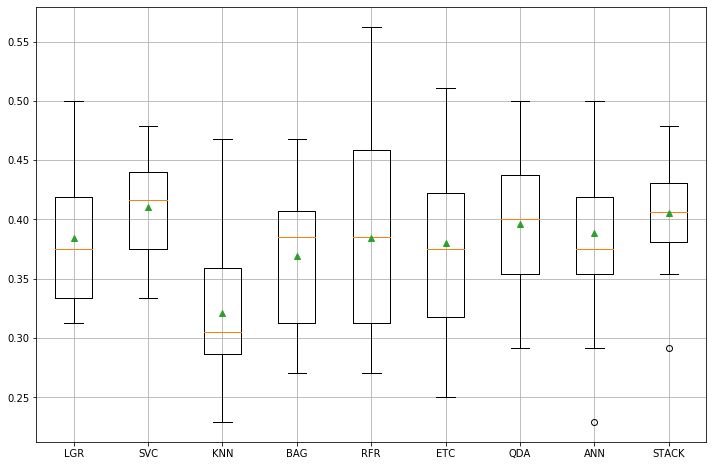

In [80]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12,8)
plt.show()